**Проект Яндекс.Практикума Прогнозы и предсказания**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Исследовательский анализ данных (EDA)**](#EDA)

[**Построение модели прогнозирования оттока клиентов**](#modeling)

[**Кластеризация клиентов**](#clustering)

[**Выводы и рекомендации**](#summary)

---




## **Описание проекта**<a  class="anchor" id="description"></a>

##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>

In [1]:
# импортируем библиотеки для работы с данными, построения моделей и визуализации информации
import numpy as np
import pandas as pd
!pip install seaborn --upgrade
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 292 kB 4.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [2]:
# загружаем данные
try:
    df=pd.read_csv(' ')
    
except:
    url='https://drive.google.com/file/d/ /view?usp=sharing'
    url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
    df = pd.read_csv(url2)



---



---




## **Предобработка данных**<a  class="anchor" id="preparing"></a>

Проверим датасет на соотвествие типов данных описанию, отсутствие пропусков и дубликатов в категориях.

In [3]:
# Функция для вывода информации о структуре и типах данных датафрейма, проверки на пропуски в столбцах и дубликаты записей

def check_dataset(dataset):
    
    try:
        name =[x for x in globals() if globals()[x] is dataset][0]
        width = 10*len(dataset.columns)
        print('\033[1m','Проверка таблицы: {}'.format(name),'\033[0m')
        print('.'*width)
        print('\033[1m','\nИнформация о типах данных:', '\033[0m')
        display(dataset.info())
        print('.'*width)
        if dataset.isna().mean().sum()==0:
            print('\033[1m', '\nПропусков в столбцах \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nДоля пропусков в столбцах:', '\033[0m')
            display(pd.DataFrame(round((dataset.isna().mean()*100),2)).style.background_gradient())
        print('.'*width)
        if dataset.duplicated().sum()==0:
            print('\033[1m', '\nДубликатов строк \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nКоличество дубликатов: \033[31;1m{}\033[0m'.format(dataset.duplicated().sum()))
        print('.'*width)
        print('\033[1m', '\n10 случайных строк датафрейма', '\033[0m')
        display(dataset.sample(10))
           
    except:
        print('Ошибка')

In [4]:
check_dataset(df)

 Проверка таблицы: df 
............................................................................................................................................
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   flo

None

............................................................................................................................................
 
Пропусков в столбцах  НЕТ 
............................................................................................................................................
 
Дубликатов строк  НЕТ 
............................................................................................................................................
 
10 случайных строк датафрейма 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
798,0,1,1,0,1,12,1,38,76.994722,12.0,13,0.479678,0.341593,0
459,1,1,0,0,1,1,0,31,13.957451,1.0,3,1.430032,0.668511,1
3101,1,0,1,0,1,6,0,29,209.805109,6.0,8,4.681557,5.024721,0
2608,0,1,0,0,1,6,0,31,89.611797,4.0,10,1.354929,1.344248,0
1319,1,1,1,1,1,6,0,26,99.585535,2.0,1,1.466680,1.255071,0
1451,1,1,0,0,0,6,1,28,117.796144,6.0,8,1.770622,1.617839,0
1873,1,1,0,0,1,6,0,29,147.674719,6.0,7,1.109065,1.057100,0
451,0,1,1,0,1,6,1,34,61.726778,5.0,6,2.544738,2.565072,0
1337,1,1,0,1,1,12,1,24,202.390508,12.0,1,0.999179,1.047047,0
3788,1,0,0,0,1,1,0,33,197.089566,1.0,2,1.518532,1.459389,0


Данные содержат 4000 уникальных полных записей, типы данных соотвествуют описанию (категориальные переменные приведены к целочисленному типу).

Приведем для удобства обращения названия столбцов к нижнему регистру.

In [5]:
for column in df.columns:
    df.rename({column:column.lower()}, axis=1, inplace=True)

---


## **Исследовательский анализ данных (EDA)**<a  class="anchor" id="preparing"></a>



---


Получим основные статистически параметры признаков в датафрейме.

In [6]:
df.describe().apply(lambda series: series.apply(lambda value: format(value, '.2f')))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Согласно предоставленным данным, наш средний посетитель это мужчина или женщина (примерно равновероятно) 29 лет, проживающий или имеющий работу в районе расположения нашего фитнес-центра, который приобрел абонемент сроком на 6 месяцев. Наш типичный посетитель, не являющийся сотрудником компании-партнера клуба, впервые пришел к нам около 4х месяцев назад, не использовав промо-код при оплате первого абонемента. Он оставил свой контактный номер телефона, поэтому мы можем связаться с ним, например, в случае его отсутствия более недели, так как обычно наш средний клиент посещает фитнес-центр около 2х раз в неделю.



---

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
pd.DataFrame(df.groupby(['churn']).agg('mean').round(2).reset_index().T).rename({0:'stay',1:'churn'},axis=1).style.background_gradient(axis=1)

,stay,churn
churn,0.000000,1.000000
gender,0.510000,0.510000
near_location,0.870000,0.770000
partner,0.530000,0.360000
promo_friends,0.350000,0.180000
phone,0.900000,0.900000
contract_period,5.750000,1.730000
group_visits,0.460000,0.270000
age,29.980000,26.990000
avg_additional_charges_total,158.450000,115.080000


Средние значения большинства признаков для клиентов лояльных клубу отличаются от аналогичных показателей клиентов, прекративших посещать наш фитнес-центр:
1. Среди клиентов остающихся в клубе доля живущих или работающих в том же районе выше на 10%, чем у "оттекших" клиентов;
2. Пользующиеся привелегиями компаний-партнеров и пришедшие по промо-коду посетители более лояльны нашему фитнес-центру;
3. Для постоянных клиентов характерны контракты длительностью 6 месяцев, в то время как для ушедших клиентов - 1 месяц;
4. Средний возраст постоянных посетителей на 3 года выше, чем у клиентов, прекративших посещение фитнес-центра;
5. Средний стаж тренировок в клубе у лояльных клиентов около 5 месяцев, а для ушедших посетителей - менее месяца;
6. Постоянные посетители занимаются в среднем 2 раза в неделю, у покинувших клуб посетителей этот показатель за весь стаж составляет 3 раза в две недели (в последний месяц перед оттоком - один раз в неделю).



---

Для визуализации распределения и корреляции между признаками объявим две функции.

In [8]:
# Функция построения парных гистограмм признаков
def plot_two_hists(var, df1, df2, title1, title2, xlabel, ylabel, **kwargs):
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 7)
    plt.subplots_adjust(wspace=0.2)
    
    df1[var].plot(kind="hist", ax=ax[0], title=title1, **kwargs)
    ax[0].title.set_fontsize(18)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)

    df2[var].plot(kind="hist", ax=ax[1], title=title2, **kwargs)
    ax[1].title.set_fontsize(18)
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel)

    miny = min(ax[0].get_ylim()[0], ax[1].get_ylim()[0])
    maxy = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
    for a in ax:
        a.set_ylim([miny, maxy])

    return fig, ax

In [9]:
# Функция построения тепловой карты матрицы корреляции
def plot_heatmap(dataframe):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(dataframe, annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='grey', cmap= 'coolwarm', cbar=False)
    ax.set_title('Correlation heatmap')
    ax.title.set_fontsize(18)
    plt.show();

Выделим в отдельные датафреймы клиентов прекративших пользоваться услугами нашего фитнес-центра и клиентов оставшихся лояльными клубу.

In [10]:
# Датафрейм с клентами, попавшими в "отток"
churn_visitors=df[df['churn']==1]
print('Количество посетителей в "оттоке": {:.0f} человек, {:.1%} от общего количества клубных карт.'.format(churn_visitors.shape[0],churn_visitors.shape[0]/df.shape[0]))

Количество посетителей в "оттоке": 1061 человек, 26.5% от общего количества клубных карт.


In [11]:
# Датафрейм с клиентами, оставшимися в клубе
loyal_visitors=df[df['churn']==0]
print('Количество лояльных посетителей: {:.0f} человек, {:.1%} от общего количества клубных карт.'.format(loyal_visitors.shape[0],loyal_visitors.shape[0]/df.shape[0]))

Количество лояльных посетителей: 2939 человек, 73.5% от общего количества клубных карт.


Построим парные гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

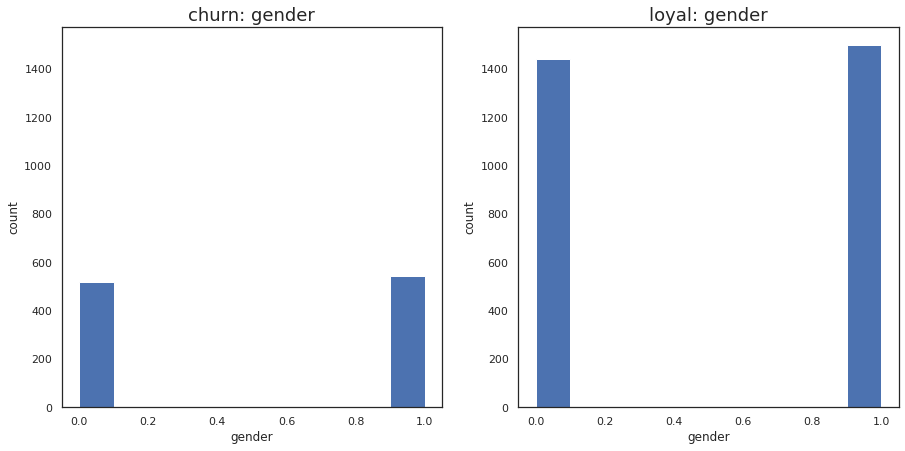

In [12]:
# Распределение по признаку "пол"
column='gender'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Визуально различия в распределении данных по признаку "пол" в обоих датафреймах не наблюдаются. Можно предположить, что гендерная структура "оттока" и оставшихся клиентов фитнес-центра совпадает.

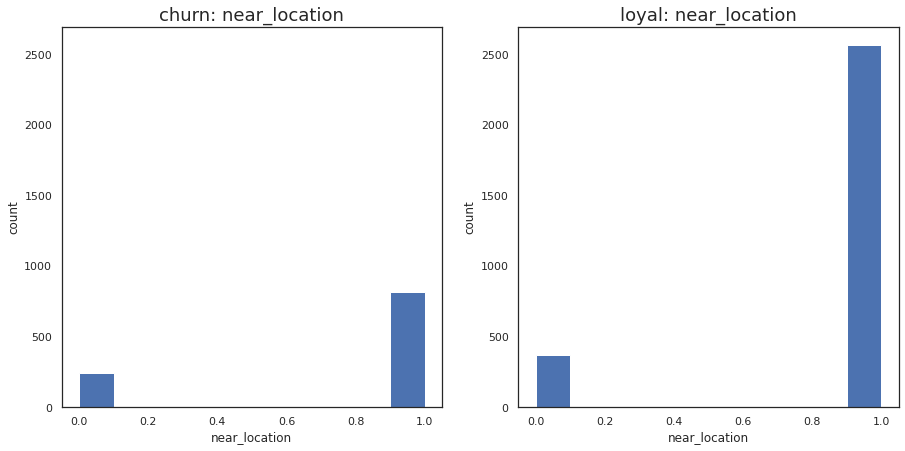

In [13]:
# Распределение по признаку "близкое расположение"
column='near_location'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Соотношение близко проживающих (работающих) и имеющих удаленную локацию для датафрейма с лояльными клиентами выше, чем для "оттока". Предполагаем, что одной из причин оттока клиентов могли стать транспортные издержки на посещение нашего фитнес-центра (финансовые и временные).

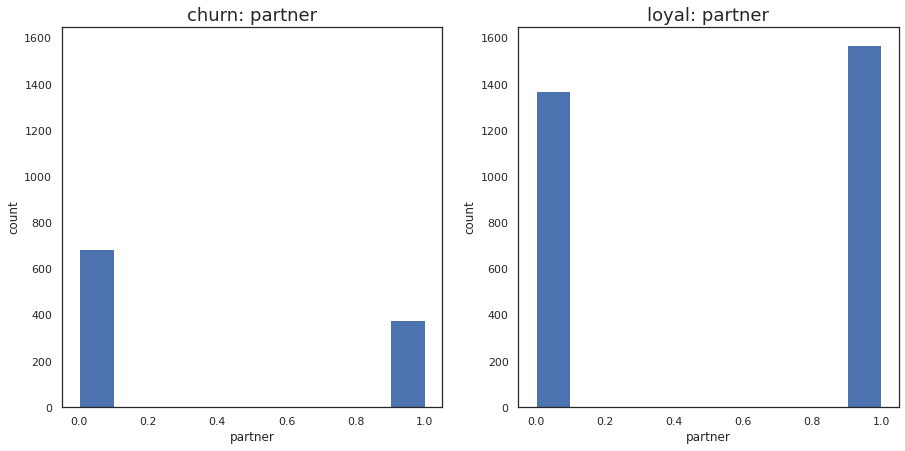

In [14]:
# Распределение по признаку "партнеры клуба"
column='partner'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Получение скидок на абонемент для сотрудников компании-партнера клуба очевидно является стимулирующим лояльность клиентов фактором.

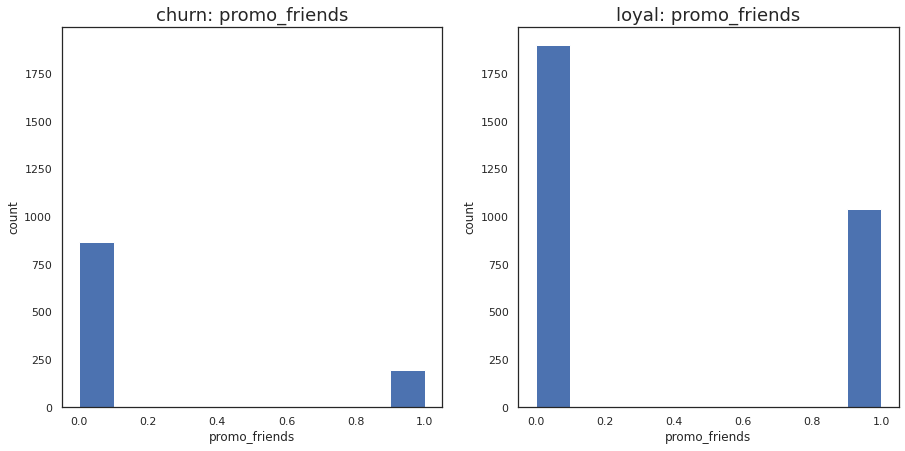

In [15]:
# Распределение по признаку "промо-код"
column='promo_friends'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Матеральная выгода от использования промо-кода при оплате первого абонемента является фактором повышающим превлекательность клуба для клиентов: доля посетителей пришедших в рамках акции "приведи друга" и оставшихся в фитнес-центре выше соотвествующей доли для "оттекших" абонентов.

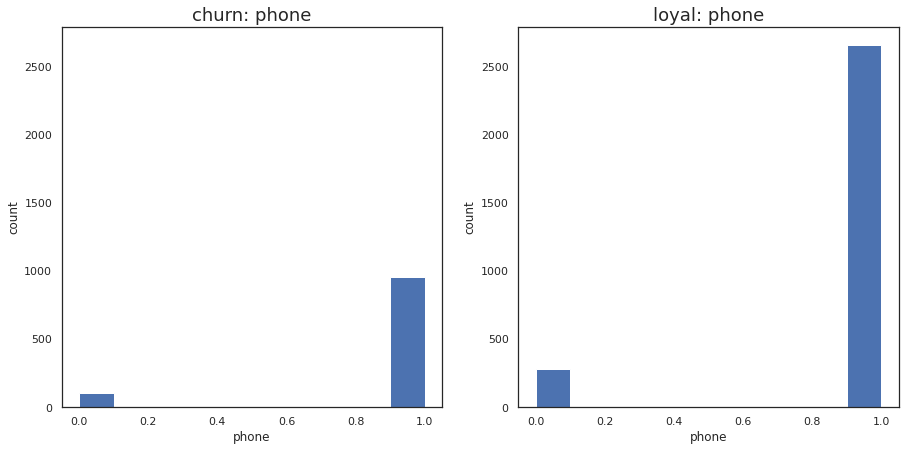

In [16]:
# Распределение по признаку "наличие контактного телефона"
column='phone'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Визуально различия в распределении данных по признаку "наличие контактного телефона" в обоих датафреймах не наблюдаются. Предполагаем, что полнота контактной информации в карточках посетителей не оказывет определяющего влияния на "отток" и лояльность клиентов фитнес-центра.

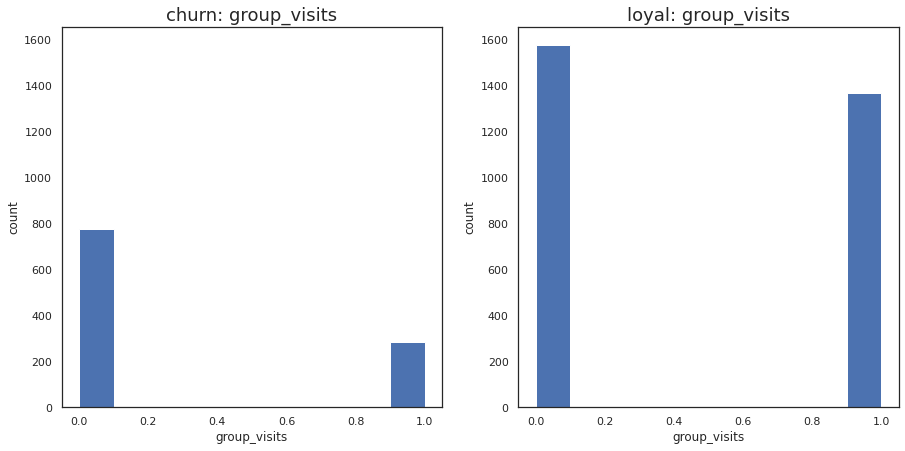

In [17]:
# Распределение по признаку "посещение групповых занятий"
column='group_visits'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Для совокупности оставшихся в фитнес-центре характерна более высокая доля клиентов, посещавших групповые занатия. Можно предположить, что вовлечение посетителей в групповые занятия, проводимые в клубе, дополнительно несущие элемент социализации, общности и взаимной мотивации, является якорным фактором для клиентов фитнес-центра.

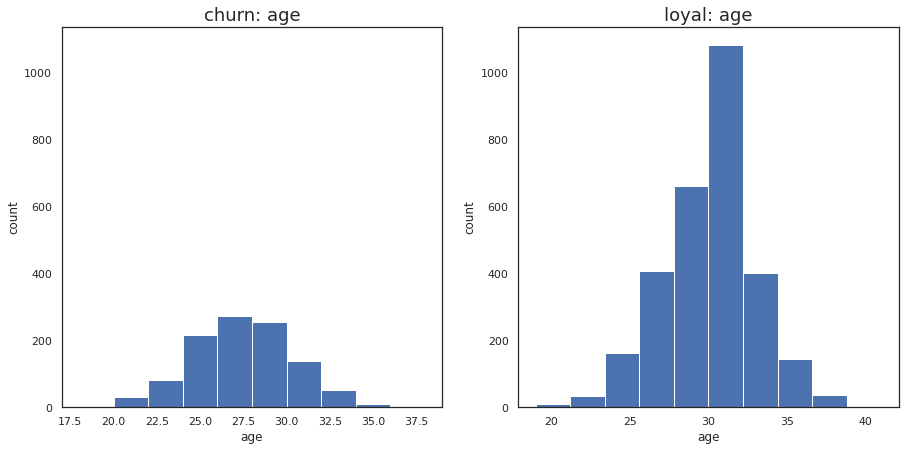

In [18]:
# Распределение по признаку "возраст"
column='age'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Данные о возрасте клиентов, попавших в "отток" и оставшихся в клубе имеют смещение распределения на 3 года вправо для лояльной группы посетителей. В то же время в отток попали кленты из обеих возрастных групп, характерных для фитнес-центра: 20-30 лет и 30-40 лет.

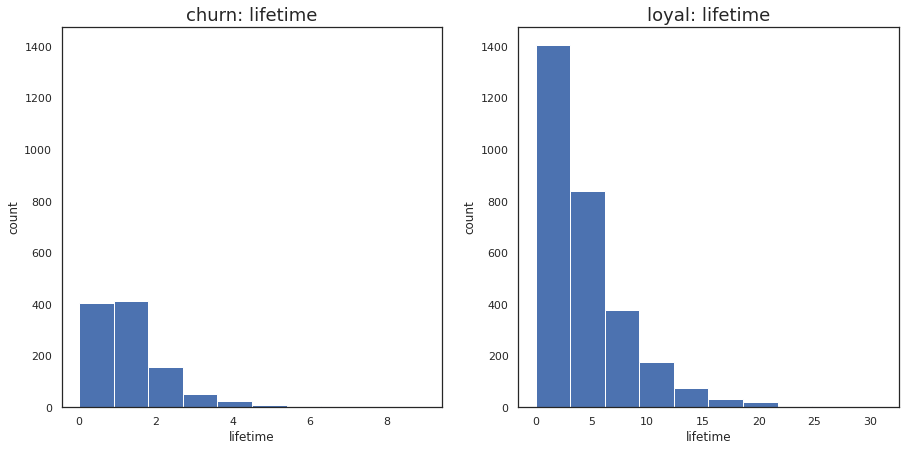

In [19]:
# Распределение по признаку "стаж"
column='lifetime'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Распределение данных о стаже посещения нашего фитнес-центра свидетельствует о том, что в "отток" чаще всего попадают клиенты на рубеже до 2х месяцев занятий. В то время как большинство лояльных клиентов клуб "удерживает" более полугода.

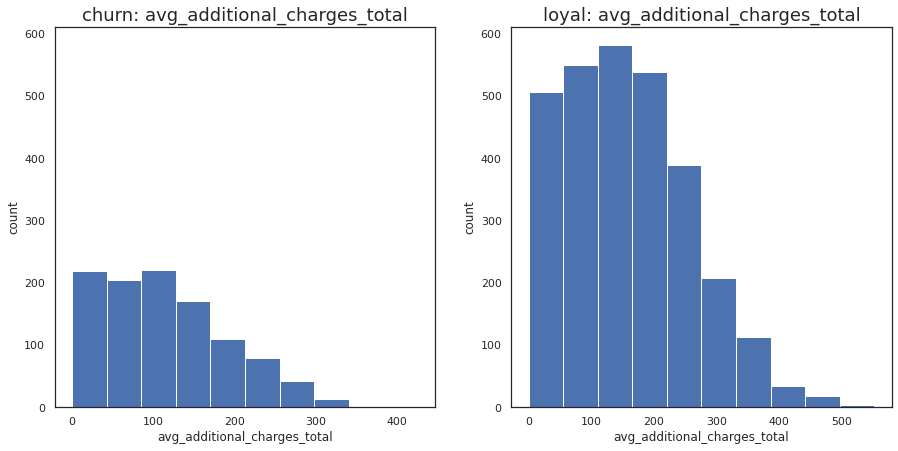

In [20]:
# Распределение по признаку "выручка от дополнительных услуг"
column='avg_additional_charges_total'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Характер распределения датафреймов по признаку "выручка от дополнительных услуг" имеет отличия для группы "оттока" и лояльных клентов. Для посетителей продолживших посещать фитнес-центр характерна максимальная частота суммарной выручки от дополнительных услуг в диаразоне от 0 до 200 ед. (0-150 для "оттока") и более широкий дипазон ее индивидуальных значений. Можно предположить, что на это распределение определяющее влияние оказывает временной фактор: клиенты из "оттока" имеют существенно меньший средние стаж и частоту тренировок и, вероятно, не успели воспользоваться услугами кафе, магазина спорт-товаров, косметического и массажного салонов. 

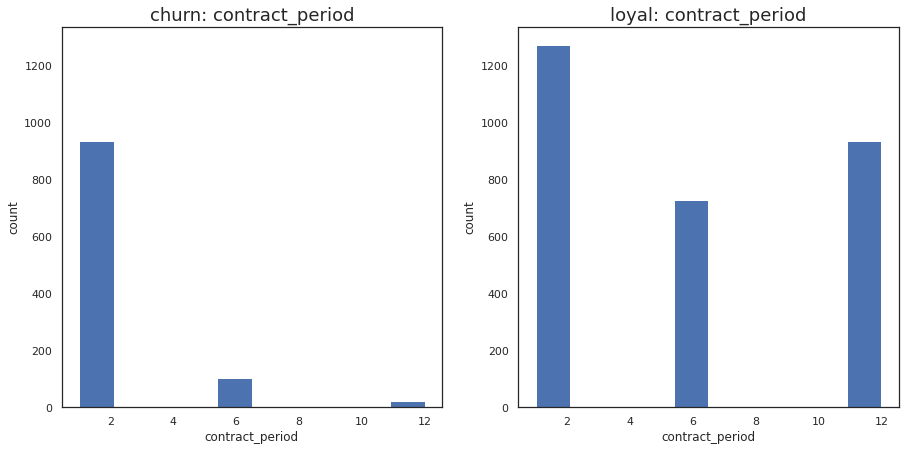

In [21]:
# Распределение по признаку "длительность текущего абонемента"
column='contract_period'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Подавляюще высокая доля краткосрочных абонементов в "оттоке" по сравнению со структурой контрактов лояльных клиентов, может свидетельствовать о том, что большинство посетителей из группы "оттока" прекращают пользоваться услугами фитнес-центра в первый, пробный месяц занятий.

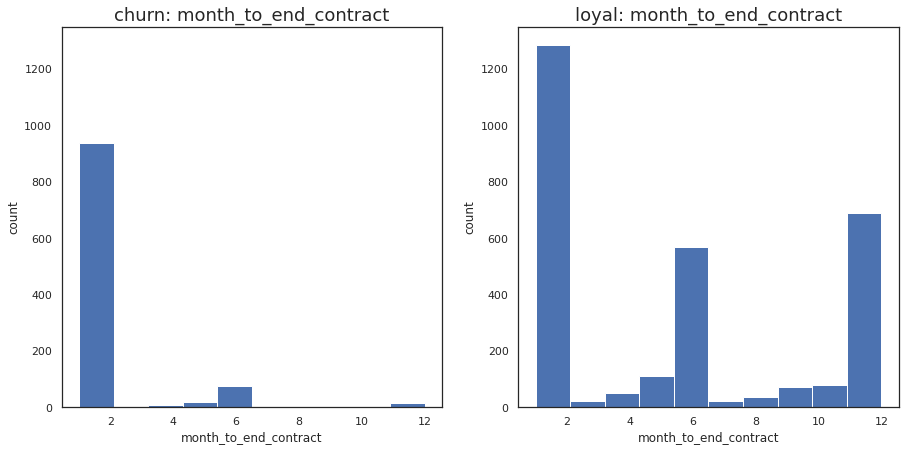

In [22]:
# Распределение по признаку "срок до окончания абонемента"
column='month_to_end_contract'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Визуально, налицо сильная корреляция распределения данных о сроке окончания действующего абонемента и его изначальной длительностью. Априори можно предположить, что на отток клиентов большее влияние оказывает остаточный срок действия абонемента по сравнению с его номиналом в месяцах.

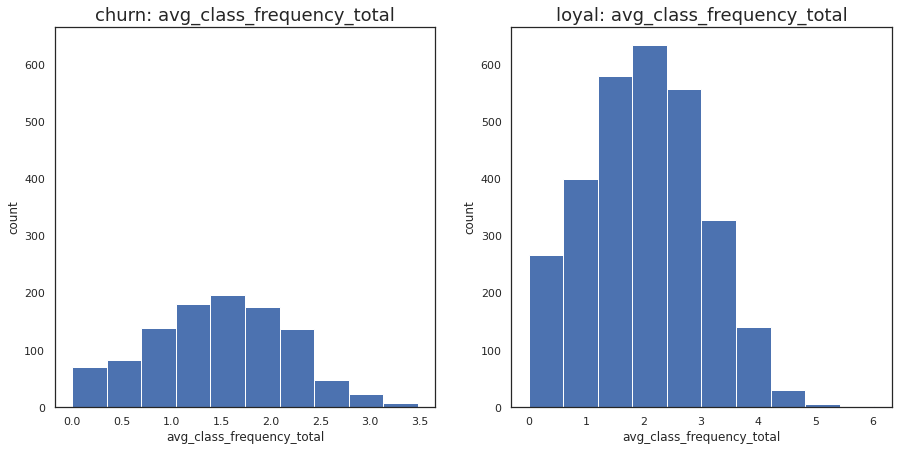

In [23]:
# Распределение по признаку "средняя частота посещений в неделю за весь стаж"
column='avg_class_frequency_total'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Показательно, что медианные значения для частоты посещений фитнес-центра для групп "оттока" и лояльных клиентов не сильно различаются: примерно 1,5 против 2х раз в неделю. Из этого можно выдвинуть предположение, что краткосрочные фитнес-цели, определяющие частоту посещения клубов, не являются определяющими для удержания клиентов.

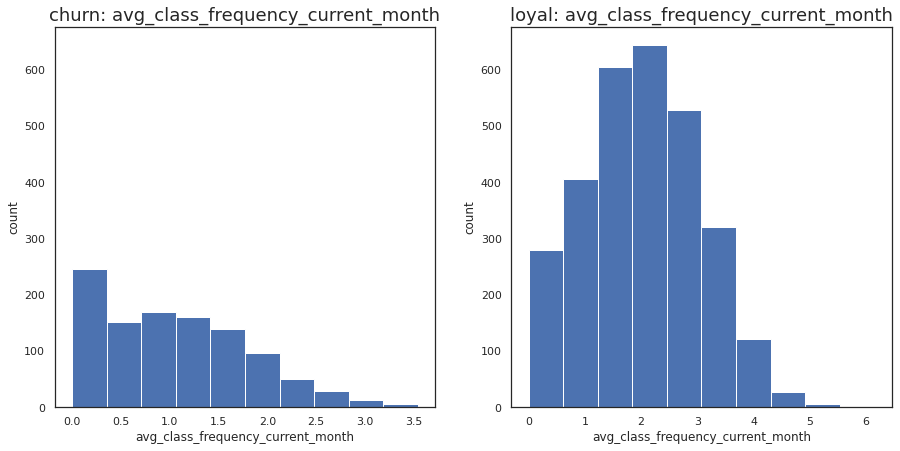

In [24]:
# Распределение по признаку "средняя частота посещений в неделю за предыдущий оттоку месяц"
column='avg_class_frequency_current_month'
plot_two_hists(column, churn_visitors, loyal_visitors, 'churn: '+column, 'loyal: '+column, column, 'count');

Вновь наблюдаем сильную корреляцию распределения средних частот посещения фитнес-центра за весь стаж и за прошлый месяц. Однако, в данном случае только для группы лояльных клиентов. Для группы "оттока" произошло смещение распределения влево: последний месяц перед оттоком покинувшие фитнес-клуб клиенты посещали занятия все реже.

Построим и визуализируем корреляционную матрицу признаков датафрейма.

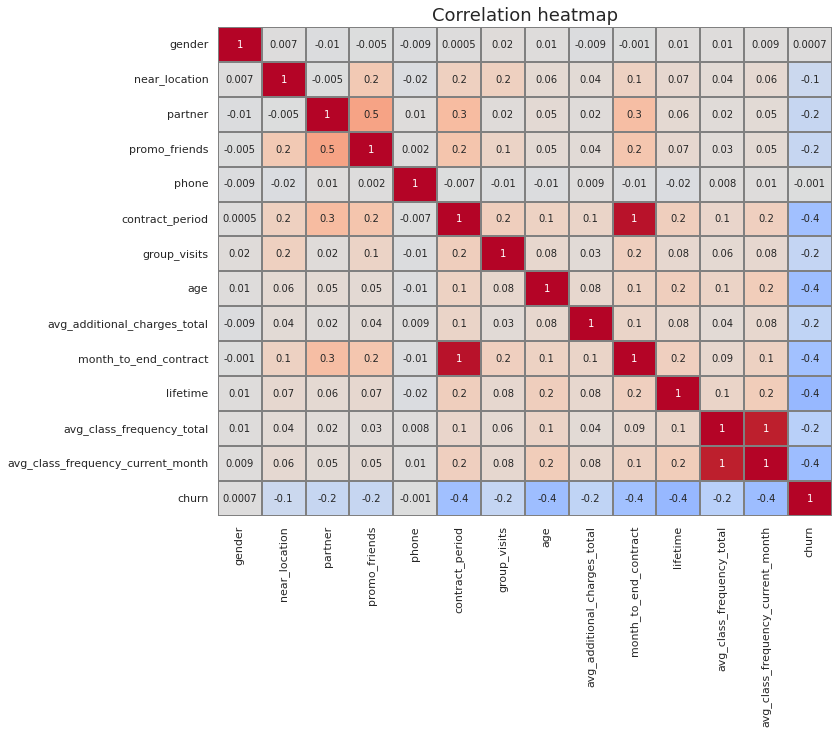

In [25]:
plot_heatmap(df.corr())

Анализируя матрицу корреляций можно заключить, что признаки в основном слабо взаимосвязаны (коэффициенты корреляции меньше 0,5). За исключением двух пар признаков упомянутых выше: длительность в месяцах и срок окончания действия текущего абонемента, средних частот посещения фитнес-центра за весь стаж и за прошлый месяц. При построении моделей прогнозирования потребуется изучения влияния этих мультиколлинеарных факторов на метрики результирующей модели.



---


## **Построение модели прогнозирования оттока клиентов**<a  class="anchor" id="modeling"></a>


Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [26]:
# выделим из датафрейма факторы и зависимую переменную
X = df.drop('churn', axis = 1)
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Стандартизируем обучающую и валидационную выборки.

In [27]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Создадаим альтернативные стандартизированные обучающую и валидационную выборки без признака "contract_period", для изучения возможного действия мультиколинеарности на метрики модели.

In [28]:
# обучим StandartScaler на обучающей выборке без столбца "длительность текущего абонемента"
scaler = StandardScaler()
scaler.fit(X_train.drop(['contract_period'],axis=1))

# преобразуем обучающий и валидационные наборы данных
X_train_st2 = scaler.transform(X_train.drop(['contract_period'],axis=1))
X_test_st2 = scaler.transform(X_test.drop(['contract_period'],axis=1))


In [29]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Построим, обучим модель логистической регресии и сделаем прогнозы на основных вылидационной и тестовой выборках.

In [30]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=42)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [31]:
# выведем все метрики для модели логистической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для основной модели логистической регрессии:',
)

Метрики для основной модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.78


Построим, обучим модель логистической регресии и сделаем прогнозы на альтернативных вылидационной и тестовой выборках.

In [32]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=42)
# обучим модель
lr_model.fit(X_train_st2, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st2)
lr_probabilities = lr_model.predict_proba(X_test_st2)[:, 1]

In [33]:
# выведем все метрики для модели логистической регрессии по урезанным данным
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для альтернативной модели логистической регрессии:',
)

Метрики для альтернативной модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.79


Доля верно угаданных ответов из всех прогнозов (accuracy) совпадает для моделей на основной и альтернативной группах выборок. Однако точность, доля правильных ответов только среди целевого класса (precision) и полнота, доля реальных объектов целевого класса, которые смогла обнаружить модель (recall) для модели на альтернативных выборках выше. Следовательно, исключение признака "длительность текущего действующего абонемента" из данных при построении модели логистической регрессии было оправданным.

*Выполненное построение альтернативных моделей на основе выборок с исключением остальных высокоскоррелированных признаков и их комбинаций не приводится, так как метрики были хуже таковых для основной модели.
Причиной, скорее всего, является неравномерность распределения этих признаков внутри подвыборок "оттока"  и остальных клиентов.*



---


Построим, обучим модель случайного леса  и сделаем прогнозы на основных вылидационной и тестовой выборках.

In [34]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=1000, random_state = 42)
# обучим модель случайного леса
tqdm(rf_model.fit(X_train_st, y_train))
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

  0%|          | 0/1000 [00:00<?, ?it/s]


In [35]:
# выведем все метрики для модели случайного леса
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.80


Построим, обучим модель случайного леса и сделаем прогнозы на альтернативных вылидационной и тестовой выборках.

In [36]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=1000, random_state = 42)
# обучим модель случайного леса на выборке без столбца "длительность текущего абонемента"
tqdm(rf_model.fit(X_train_st2, y_train))
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st2)
rf_probabilities = rf_model.predict_proba(X_test_st2)[:, 1]

  0%|          | 0/1000 [00:00<?, ?it/s]


In [37]:
# выведем все метрики для модели случайного леса по урезанным данным
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.80


Для модели случайного леса метрики Доля правильных ответов, доля верно угаданных ответов из всех прогнозов (accuracy) и Точность, доля правильных ответов только среди целевого класса (precision) совпадают с рассчитанными для модели логистической регресси (хотя для этого пришлось увеличить параметр n_estimators до 1000). Это же справедливо и для моделей, построенных на альтернативных выборках.
Модели случайного леса обладают большей Полнотой (recall), то есть способностью обнаруживать объекты целевого класса нам где они действительно существуют. 



---


## **Кластеризация клиентов**<a  class="anchor" id="clustering"></a>


Проведем иерархическую агломеративную кластеризацию клиентов: построим дендрограмму.

In [38]:
# Осуществим обязательную стандартизацию данных перед работой с алгоритмами
X_sc = scaler.fit_transform(df.drop('churn',axis=1))

# Построим матрицу расстояний
linked = linkage(X_sc, method = 'ward')

  0%|          | 0/5 [00:00<?, ?it/s]


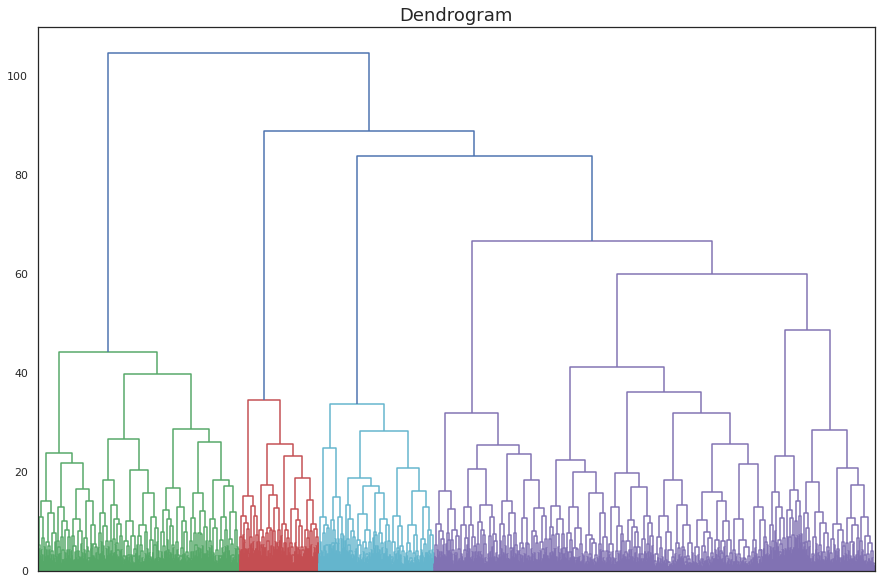

In [39]:
# Построим дендрограмму
f, ax = plt.subplots(figsize=(15, 10)) 
tqdm(dendrogram(linked, orientation='top',no_labels=True))
ax.set_title('Dendrogram')
ax.title.set_fontsize(18)
plt.show() 

Предложенное оптимальное число кластеров клиентов фитнес-центра 4 — четыре разных цвета на графике.


---



Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [40]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=42)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [41]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
pd.DataFrame(round(df.groupby(['cluster_km']).agg('mean').T,2)).style.background_gradient(axis=1)

cluster_km,0,1,2,3,4
gender,0.500000,0.520000,0.480000,0.560000,0.500000
near_location,0.000000,0.860000,1.000000,0.980000,0.960000
partner,0.460000,0.470000,0.350000,0.360000,0.780000
promo_friends,0.080000,0.310000,0.240000,0.240000,0.570000
phone,1.000000,0.000000,1.000000,1.000000,1.000000
contract_period,2.350000,4.790000,1.950000,2.690000,10.920000
group_visits,0.220000,0.430000,0.340000,0.470000,0.550000
age,28.480000,29.300000,28.170000,30.110000,29.990000
avg_additional_charges_total,135.460000,143.960000,131.520000,161.590000,160.880000
month_to_end_contract,2.200000,4.480000,1.860000,2.480000,9.980000


In [42]:
# Определим размеры полученных кластеров
pd.DataFrame(df.groupby(['cluster_km'])['cluster_km'].agg('count')).rename({'cluster_km':'count'},axis=1).reset_index().drop('cluster_km',axis=1).style.background_gradient()

,count
0,505
1,385
2,1260
3,847
4,1003


Алгоритм кластеризации распределил наших клиентов на пять кластеров. Обращают на себя внимание кластеры с номерами 1 и 2. Это кластеры клиентов с наименьшей долей оттока. 

К этим кластерам алгоритм отнес проживающих по-близости от фитнес-центра клиентов, имеющих наибольший средний стаж занятий в клубе и активно пользубщихся дополнительными платными услугами.

Различаются кластеры 1 и 2 по доле сотрудников компаний-партнеров, длительности контрактного периода и частоте посещения занятий.

К кластеру с номером 3 алгоритм отнес  клиентов с наибольней долей удаленно проживающих (работающих), которые в наименьшей степени воспользовались промо-кодом при оплате первого абонемента и имеют низкую заинтересованыность в групповых занятиях. Посетители из этого кластера приобретали в основном краткосрочные абонементы, которыми мало пользовались (редко посещали клуб). В среднем с момента первого посещения клуба у них прошло чуть более 2х месяцев. Клиента из этого кластера имеют самую высокую долю оттока.

Алгоритм распределил в кластер с номером 0 клиентов сто-процентно  воспользовавшихся промо-кодом при оплате первого абонемента. Они, в основном, проживают по-близости и являются сотрудниками компаний-партнеров. 

Промежуточное положение занимает четвертый кластер, в который "попали" клиенты выделяющиеся своей "скрытностью" (не предоставили контактный телефонный номер). Остальные показатели четвертого кластера занимают среднее положение между полярными значениями кластеров номер 0 и 1, 2.



---


Построим распределения признаков для кластеров.

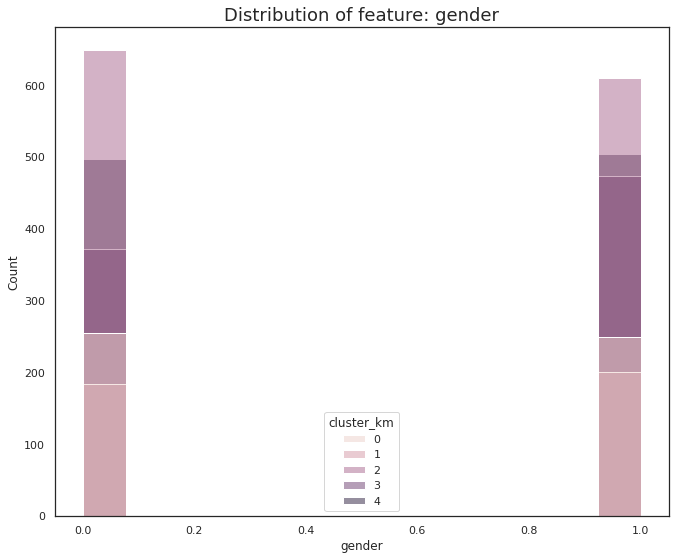

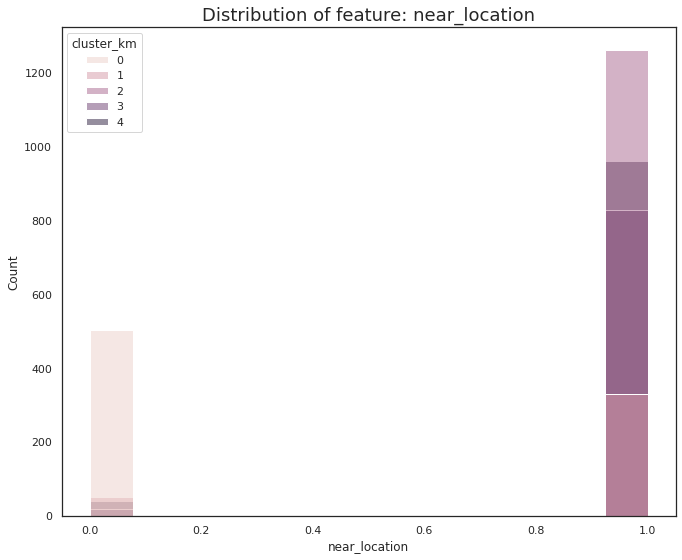

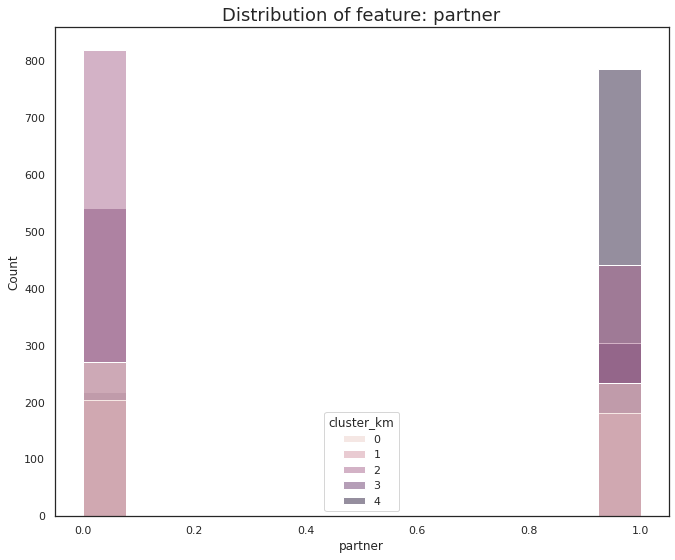

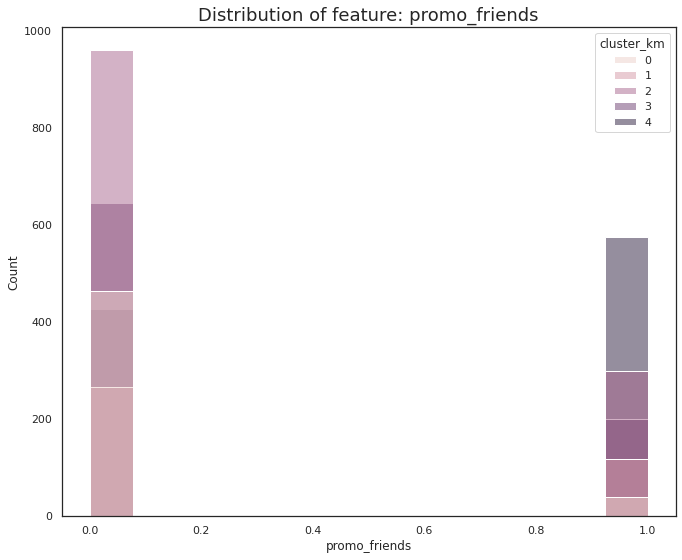

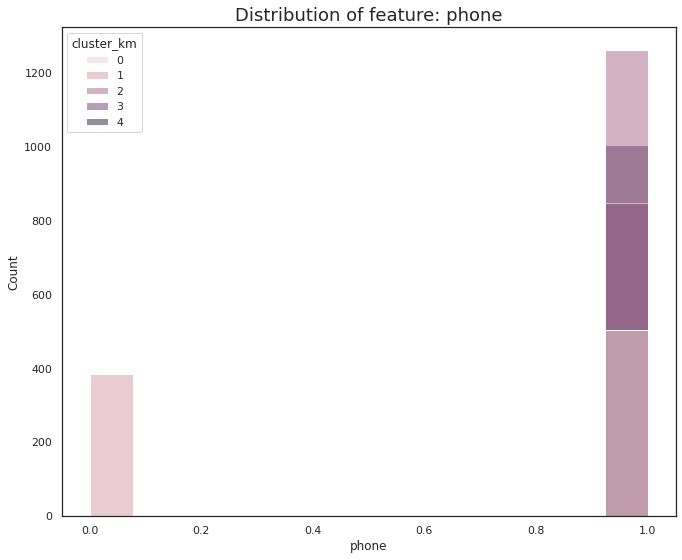

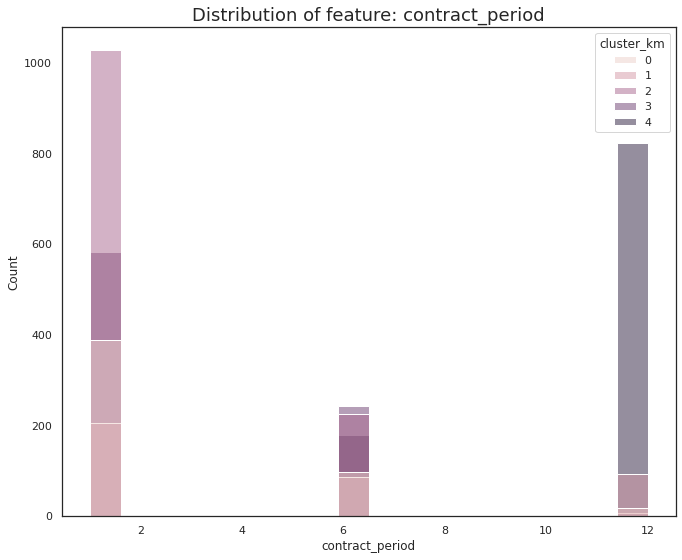

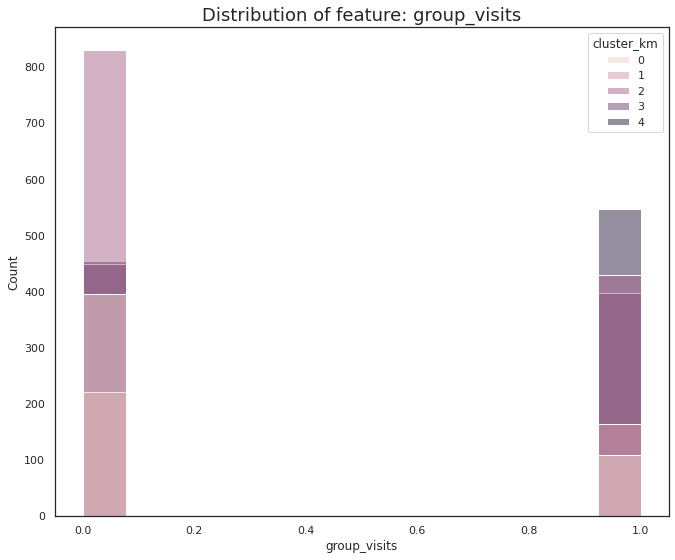

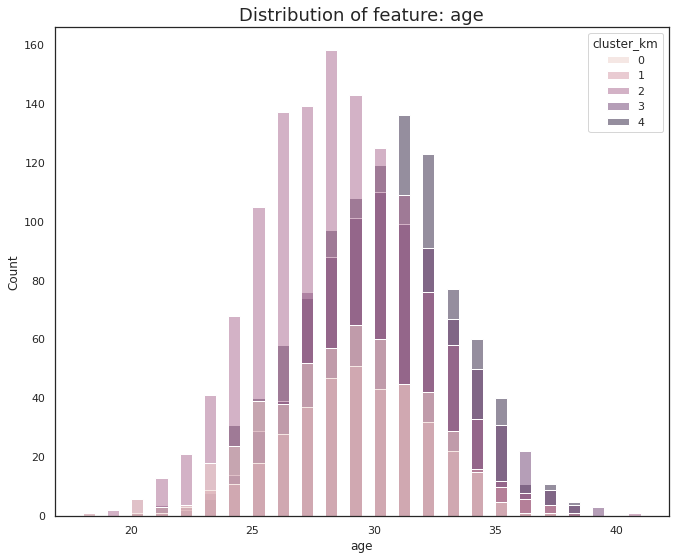

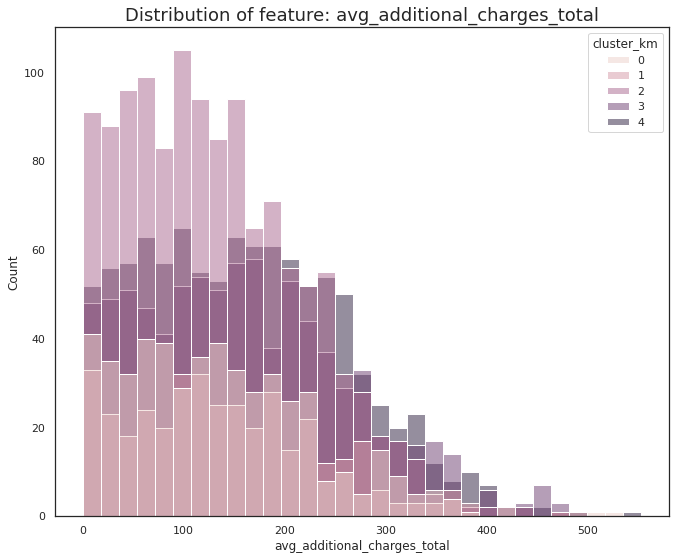

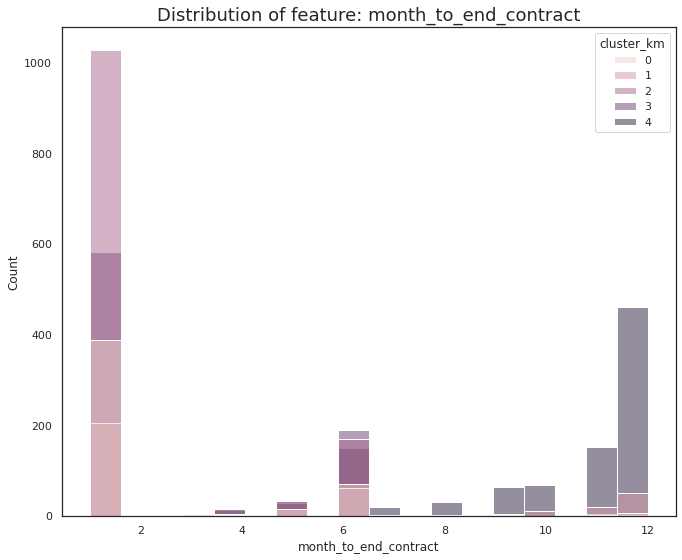

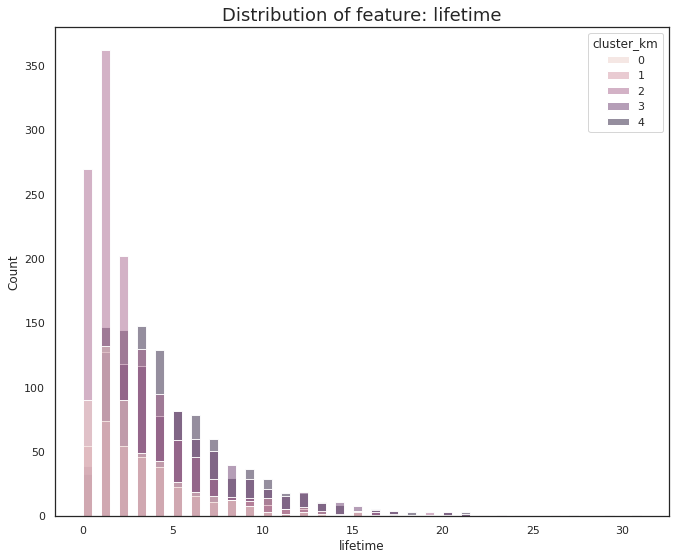

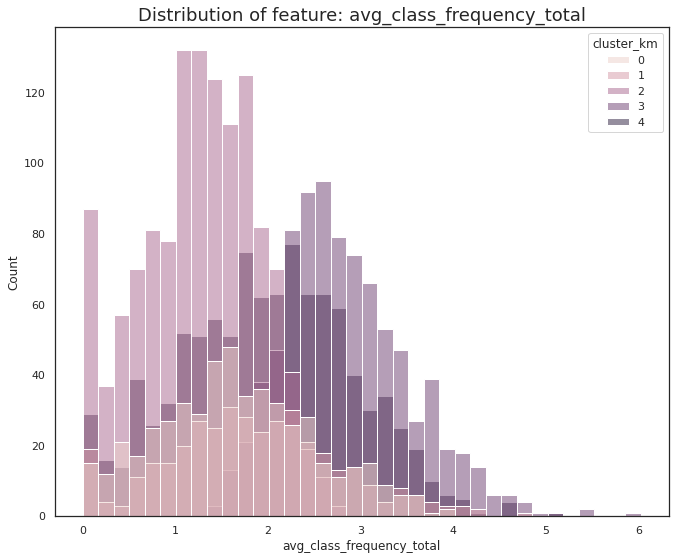

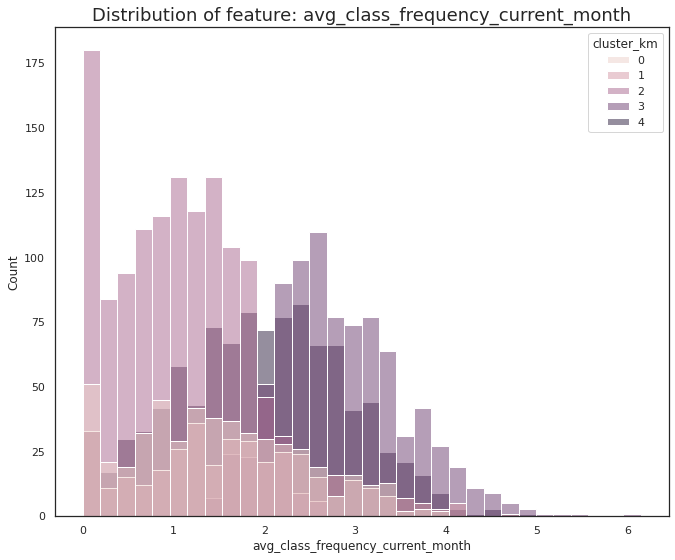

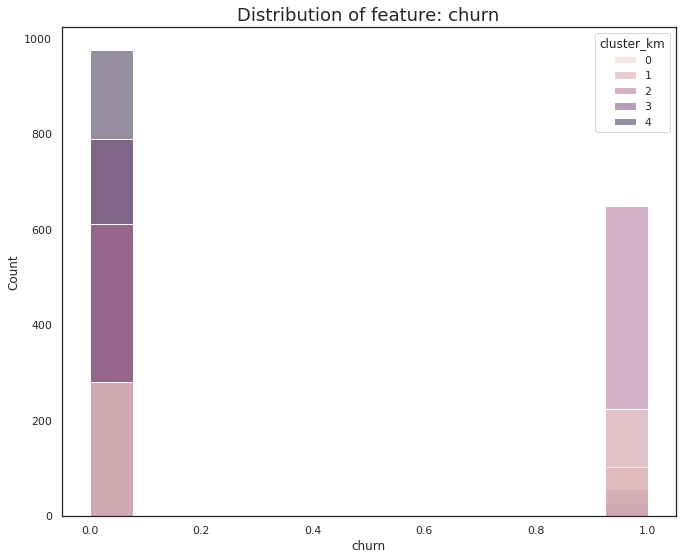

In [43]:
for column in df.drop('cluster_km',axis=1).columns:
    f, ax = plt.subplots(figsize=(11, 9))
    sns.histplot(data=df, x=column, hue='cluster_km')
    ax.set_title('Distribution of feature: '+column)
    ax.title.set_fontsize(18)
    plt.show()

Расчитаем долю оттока по кластерам.

In [44]:
round(df.groupby(['cluster_km'])['churn'].mean()*100,1)

cluster_km
0    44.4
1    26.8
2    51.5
3     6.7
4     2.8
Name: churn, dtype: float64

Наиболее лояльные клиенты отнесены к кластерам с номерами 1 и 2, наибольший "отток" наблюдается среди посетителей фитнес-центра из кластера 3.



---


## **Выводы и рекомендации**<a  class="anchor" id="summary"></a>


По результатам анализа распределения показателей по группам клиентов и проведенной кластеризации можно сформулировать следующие выводы и рекомендации:
1. Основной отток клиентов происходит на рубеже второго месяца занятий в фитнес-центре. Это может свидетельствовать о наличии как субъективных причин у клиента, так и объективных причин, связанных с организацией работы в клубе. Например, нарушение процесса "курирования" клиента (мониторинг прогресса тренировок, выявление и стимулирование потребностей в основных и дополнительных услугах, мотивирование), отсутствие или недостаток тренерской базы, неадекватные тренировочные и бытовые условия. Можно рекомендовать:
    - формирование и фиксация портрета запросов и интересов клиента во время обзорной экскурсии для новых посетителей;
    - проведение тестирования новых клиентов в любой форме по истечении первых трех недель посещения фитнес-центра. На предмет их удовлетворенности условиями в клубе и несоответствий ожиданиям.
2. Большая часть нелояльных клиентов прекратили посещать фитнес-центр в конце оплаченного периода краткосрочного (1 месяц) абонемента. Удержанию клиентов может помочь стимулирование посетителей приобретать средне и долгосрочные абонементы. Например:
    - предоставление дисконта и рассрочки при оплате средне и долгосрочных абонементов;
    - включение в стоимость средне и долгосрочных абонементов дополнительных услуг фитнес-центра как бонус.
3. Лояльности клиентов способствует их социализация внутри фитнес-клуба, взаимная мотивация и ощущение принадлежности к группе. Можно рекомендовать:
    - продвижение для новых клиентов групповых занятий (например, бесплатное пробное);
    - использование личной и контактной информации клиентов для предложения индивидуальных пакетов услуг, информирования о проведении мероприятий, акций для членов клуба.